In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [166]:
#importing Dataset
training_data = pd.read_csv(r"datasets/Data_Train.csv")

In [167]:
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [168]:
training_data.shape

(10683, 11)

In [169]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [170]:
#Checking for the missing values
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [171]:
#Handling the missing values
training_data.dropna(inplace = True)
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [172]:
#Statistical Analysis
training_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [173]:
#Checking Distribution of the Categorical data
print(training_data["Airline"].value_counts(),"\n")
print(training_data["Source"].value_counts(),"\n")
print(training_data["Destination"].value_counts(),"\n")
print(training_data["Total_Stops"].value_counts(),"\n")

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64 

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64 

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64 



Exploratory Data Analysis
1.From above description, we get to know that "Date_of_Journey", "Dep_time" and "Arrival_time" are of "object" type. So, we have to convert them into datetime object for using them for prediction of the fare price.
2.For converting, we use pd.to_datetime() function of the pandas.

In [174]:
training_data["Date_of_Journey"] = pd.to_datetime(training_data.Date_of_Journey, format = "%d/%m/%Y")
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [175]:
#Adding new columns( Journey_day, Journey_month, Journey_year)

#extracting day from date
training_data['Journey_Day'] = training_data['Date_of_Journey'].dt.day

#extracting month from date
training_data['Journey_Month'] = training_data['Date_of_Journey'].dt.month


training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [176]:
#Droping the 'Date_of_Journey' column because now it is of no use
training_data.drop(['Date_of_Journey'],axis = 1, inplace=True)
training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [177]:
#Converting Arrival_Time into datetime
training_data["Arrival_Time"] = pd.to_datetime(training_data.Arrival_Time)
training_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3940\4025481622.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data["Arrival_Time"] = pd.to_datetime(training_data.Arrival_Time)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2023-09-11 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2023-09-11 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2023-09-11 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [178]:
#adding new columns (Arrival_hour, Arrival_min)

#extracting Arrival hour
training_data['Arrival_hour'] = pd.to_datetime(training_data.Arrival_Time).dt.hour

#Extracting Arrival Minute
training_data['Arrival_min'] = pd.to_datetime(training_data.Arrival_Time).dt.minute

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,2023-09-11 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,2023-09-11 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,2023-09-11 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [179]:
#Droping Arrival_Time Column because it is of no use
training_data.drop(['Arrival_Time'], axis = 1, inplace=True)
training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [180]:
#Converting Dep_Time into datetime
training_data['Dep_Time'] = pd.to_datetime(training_data.Dep_Time)
training_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3940\2701000737.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data['Dep_Time'] = pd.to_datetime(training_data.Dep_Time)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2023-09-11 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2023-09-11 05:50:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2023-09-11 09:25:00,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2023-09-11 18:05:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2023-09-11 16:50:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [181]:
#Adding new Columns Dep_hour and Dep_min
#Adding new column Dep_hour using Dep_Time
training_data['Dep_hour'] = pd.to_datetime(training_data.Dep_Time).dt.hour

#Adding new column Dep_min using Dep_Time
training_data['Dep_min'] = pd.to_datetime(training_data.Dep_Time).dt.minute

training_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2023-09-11 22:20:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2023-09-11 05:50:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2023-09-11 09:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2023-09-11 18:05:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2023-09-11 16:50:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [182]:
#Dropping Dep_Time Column since it has no use
training_data.drop(['Dep_Time'], axis=1, inplace=True)

training_data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [183]:
#Converting Duration into Duration in minutes
duration =  list(training_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        
training_data["Duration_min"] =  minutes
training_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [184]:
#Droping Duration Column because it is of no use
training_data.drop("Duration", axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,2019,21,35,16,50,285


Handling Categorical Variables
Label Encoder -> We use these when we have Ordinal Data in our Dataset.
OneHot Encoder -> We use these when we have Nominal Data in our Dataset.

In [185]:
#Checking Distribution of Source column
training_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

e:\Internship\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


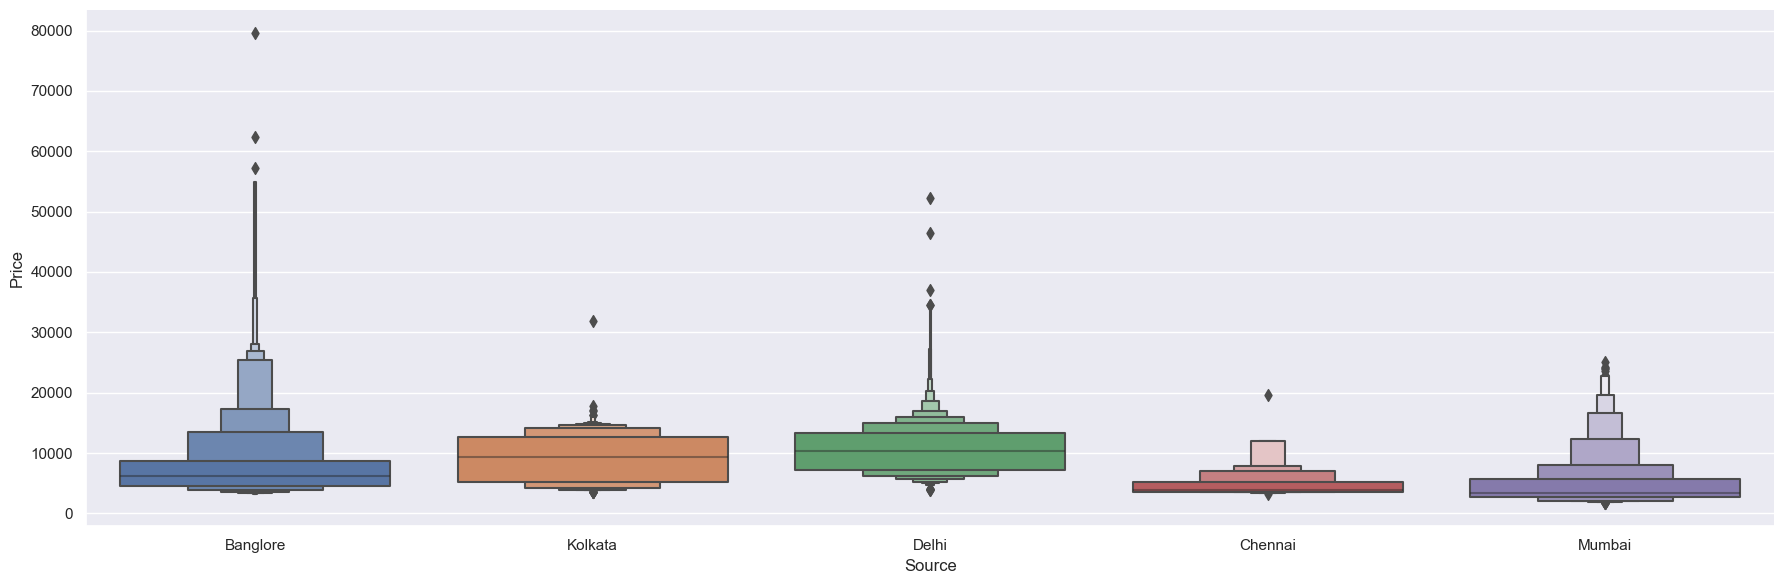

In [186]:
#Visualizng source vs price
sns.catplot(x="Source",y="Price",data=training_data, kind='boxen', aspect=3, height=6);

In [187]:
#Extracting Source column from Dataframe and encode it into OneHot Encoding
source = training_data['Source']
source = pd.get_dummies(source , drop_first = True).astype(int)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [188]:
#Checking Distribution of Destination column
training_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

e:\Internship\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


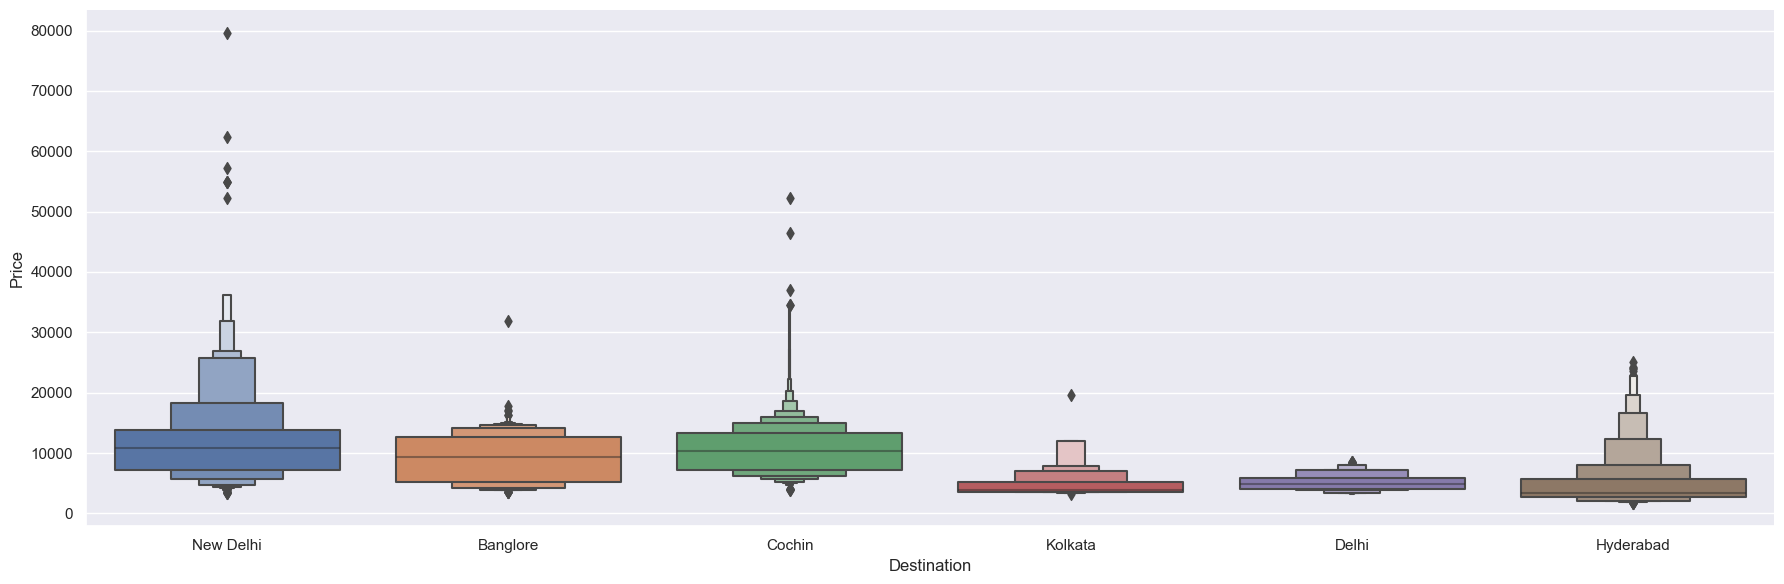

In [189]:
#Visualizing Destination vs Price 
sns.catplot(x = "Destination", y = "Price", data = training_data, kind = 'boxen', aspect = 3, height = 6)

In [190]:
#Extracting Destination column from Dataframe and encode it into OneHot Encoding
destination = training_data['Destination']
destination = pd.get_dummies(destination , drop_first = True).astype(int)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [191]:
#Checking Distribution of Airline column
training_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

e:\Internship\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


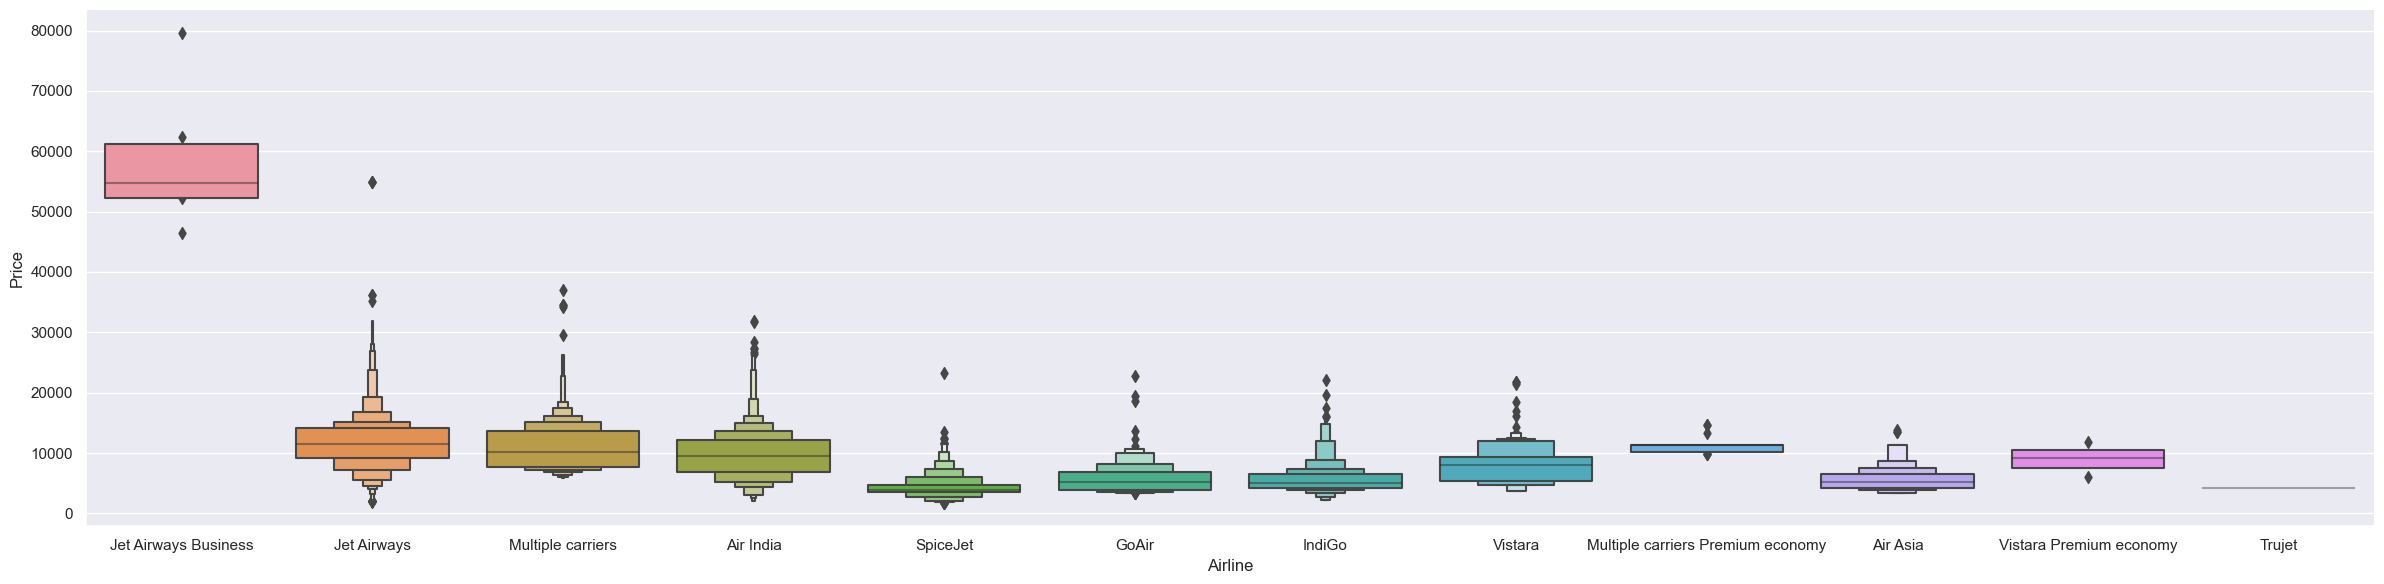

In [192]:
#visualizing Airline vs Price
sns.catplot(x='Airline', y='Price', data=training_data.sort_values("Price", ascending = False), kind='boxen',aspect=4,height=6)

In [193]:
#Extracting Airline column from Dataframe and encode it into OneHot Encoding
airlines = training_data['Airline']
airlines = pd.get_dummies(airlines,columns=training_data['Airline'],drop_first = True).astype(int)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Here, The "Route" and "Total_Stops" columns are correlated with each other. It means the "Route" shows us the Source, Intermediate stops and Destination and "Total_Stops" is number of Intermediate Stops. So, in regression we have to remove these correlated columns.

In [194]:
#Droping Route Column to remove Correlation
training_data.drop('Route', axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,285


In [195]:
#Checking Distribution of Total_Stops column
training_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [196]:
#Replacing String values with the integer for calculations
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
training_data.replace(stops, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [197]:
#Checking Distribution of Additional_Info column
training_data['Additional_Info'].value_counts(normalize = True)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: proportion, dtype: float64

Here, we can see that approximately 80% of the rows in the "Additional_Info" column is filled with "no_info" which is dominating and can leads to bad predictions. So, we have to drop this column.

In [198]:
#Droping Additional_Info Column
training_data.drop('Additional_Info', axis = 1, inplace = True)
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,285


In [199]:
#Merging all the dataframe 
processed_data = pd.concat([training_data, source, destination, airlines], axis = 1)
processed_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,...,0,1,0,0,0,0,0,0,0,0


In [200]:
processed_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,2019,1,10,22,20,170,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,2019,13,15,5,50,445,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,1140,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,325,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,285,...,0,1,0,0,0,0,0,0,0,0


In [201]:
processed_data.shape

(10682, 30)

Now our processed data contains 10682 rows and 29 columns.

PreProcessing Test Data

In [202]:
test_data = pd.read_csv(r"datasets/Test_set.csv")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [203]:
test_data.shape

(2671, 10)

In [204]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [205]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [206]:
print(test_data["Airline"].value_counts(),"\n")
print(test_data["Source"].value_counts(),"\n")
print(test_data["Destination"].value_counts(),"\n")
print(test_data["Total_Stops"].value_counts(),"\n")

print(test_data['Destination'].value_counts(),"\n")

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64 

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64 

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64 

Total_Stops
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: count, dtype: int64 

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75


In [207]:
test_data["Date_of_Journey"] = pd.to_datetime(test_data.Date_of_Journey, format = "%d/%m/%Y")
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [208]:
#Adding new columns( Journey_day, Journey_month, Journey_year)

#extracting day from date
test_data["Journey_day"] = test_data["Date_of_Journey"].dt.day

#extracting month from date
test_data["Journey_month"] = test_data["Date_of_Journey"].dt.month
training_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,16,50,285


In [209]:
#Droping the 'Date_of_Journey' column because noe it is of no use
test_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [210]:
#Converting Arrival_Time into datetime
test_data["Arrival_Time"] = pd.to_datetime(test_data.Arrival_Time)

test_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3940\2082008534.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_Time"] = pd.to_datetime(test_data.Arrival_Time)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,2023-09-11 10:20:00,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,2023-09-11 21:00:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6


In [211]:
#adding new columns (Arrival_hour, Arrival_min)

#extracting Arrival hour
test_data["Arrival_hour"] = test_data["Arrival_Time"].dt.hour

#extracting Arrival hour
test_data["Arrival_min"] = test_data["Arrival_Time"].dt.minute

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,2023-06-07 04:25:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,2023-09-11 10:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,2023-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,2023-09-11 21:00:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,2023-06-25 02:45:00,2h 50m,non-stop,No info,24,6,2,45


In [212]:
#Droping Arrival_Time Column because it is of no use
test_data.drop(['Arrival_Time'], axis = 1, inplace = True)

test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,2h 50m,non-stop,No info,24,6,2,45


In [213]:
#Converting Dep_time to datetime 
test_data["Dep_Time"] = pd.to_datetime(test_data.Dep_Time)
test_data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3940\3728445947.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_Time"] = pd.to_datetime(test_data.Dep_Time)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,2023-09-11 17:30:00,10h 55m,1 stop,No info,6,6,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,2023-09-11 06:20:00,4h,1 stop,No info,12,5,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,2023-09-11 19:15:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,2023-09-11 08:00:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2023-09-11 23:55:00,2h 50m,non-stop,No info,24,6,2,45


In [214]:
#Adding new columns (Dep_hour, Dep_min)

#extracting Arrival hour
test_data["Dep_hour"] = test_data["Dep_Time"].dt.hour

#extracting Arrival minute
test_data["Dep_min"] = test_data["Dep_Time"].dt.minute
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,2023-09-11 17:30:00,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,2023-09-11 06:20:00,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,2023-09-11 19:15:00,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,2023-09-11 08:00:00,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2023-09-11 23:55:00,2h 50m,non-stop,No info,24,6,2,45,23,55


In [215]:
#Droping Dep_Time Column because it is of no use
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,2,45,23,55


In [216]:
duration =  list(test_data['Duration'])
minutes = []

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            minutes.append( int(duration[i].split(sep = 'h')[0]) * 60) 
        else: 
            minutes.append(int(duration[i].split(sep = 'm')[0]))
    else:       
        minutes.append(int(duration[i].split(sep = 'h')[0]) * 60 + int(duration[i].split(sep =  'm')[0].split()[-1]))
        

In [217]:
test_data["Duration_min"] =  minutes
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,2,45,23,55,170


In [218]:
test_data.drop("Duration", axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,2,45,23,55,170


In [219]:
test_data['Additional_Info'].value_counts()

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64

Handling Categorical Variables


We use Label Encoder when we have Ordinal Data. Since, we have only nominal data in our dataset, we will use one hot encoder to handle the categorical columns.

In [220]:
#Converting Source 
test_data['Source'].value_counts()

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

In [221]:
source = test_data['Source']
source = pd.get_dummies(source , drop_first = True).astype(int)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [222]:
test_data['Destination'].value_counts()

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64

In [223]:
destination=test_data['Destination']
destination = pd.get_dummies(destination,drop_first=True).astype(int)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [224]:
test_data['Airline'].value_counts()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

In [225]:
airlines = test_data['Airline']
Airline = pd.get_dummies(airlines , drop_first = True).astype(int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


The columns, 'Route' and 'Total_Stops' are correlated. In regression problem, we have to remove the correlated features. Thus we drop route coulumn.

In [226]:
test_data.drop('Route', axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,2,45,23,55,170


In [227]:
test_data['Total_Stops'].value_counts()

Total_Stops
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: count, dtype: int64

In [228]:
stops =  {'Total_Stops' : {'non-stop' : 0, '1 stop' : 1, '2 stops' :  2, '3 stops':  3, '4 stops' : 4}}
test_data.replace(stops, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,No info,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,No info,24,6,2,45,23,55,170


In [229]:
test_data['Additional_Info'].value_counts(normalize = True)

Additional_Info
No info                         0.804193
In-flight meal not included     0.166230
No check-in baggage included    0.028454
1 Long layover                  0.000374
Business class                  0.000374
Change airports                 0.000374
Name: proportion, dtype: float64

We can se that approx. 80% of the data in the column Additional_Info has the value 'no info'. The data in this column is not randomized and causes a problem in our prediction. Thus, we drop this column.

In [230]:
test_data.drop('Additional_Info', axis = 1, inplace = True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,170


In [231]:
processed_test = pd.concat([test_data, source, destination, airlines], axis = 1)
processed_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline
0,Jet Airways,Delhi,Cochin,1,6,6,4,25,17,30,...,0,1,0,0,1,0,0,0,0,Jet Airways
1,IndiGo,Kolkata,Banglore,1,12,5,10,20,6,20,...,0,0,1,0,0,0,0,0,0,IndiGo
2,Jet Airways,Delhi,Cochin,1,21,5,19,0,19,15,...,0,1,0,0,1,0,0,0,0,Jet Airways
3,Multiple carriers,Delhi,Cochin,1,21,5,21,0,8,0,...,0,1,0,0,1,0,0,0,0,Multiple carriers
4,Air Asia,Banglore,Delhi,0,24,6,2,45,23,55,...,0,0,0,0,0,1,0,0,0,Air Asia


In [232]:
processed_test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace =True)
processed_test.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,655,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,240,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,1425,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,780,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,170,0,0,0,0,0,1,0,0,0


In [233]:
processed_test.shape
processed_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

Feature Selection


Here, we find out the best features for training the model and also see at what extent they contribute to our fare prediction. We do these by
    1.Heatmap
    2.feature_importances_

In [234]:
#Checking for number of rows and columns
processed_data.shape

(10682, 30)

In [235]:
#Checking for columns
processed_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Journey_Year',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_min',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [236]:
#Extracting X = Independent/Predictor Variable and Y = Dependent/Target Variable
X = processed_data.drop("Price", axis = 1).values
Y = processed_data["Price"].values

print("X =", X)
print()
print("Y =", Y)

X = [[ 0 24  3 ...  0  0  0]
 [ 2  1  5 ...  0  0  0]
 [ 2  9  6 ...  0  0  0]
 ...
 [ 0 27  4 ...  0  0  0]
 [ 0  1  3 ...  0  1  0]
 [ 2  9  5 ...  0  0  0]]

Y = [ 3897  7662 13882 ...  7229 12648 11753]


In [239]:
training_data.drop(columns=['Journey_Year'])

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,22,25,19,55,150
10679,Air India,Kolkata,Banglore,0,4145,27,4,23,20,20,45,155
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,11,20,8,20,180
10681,Vistara,Banglore,New Delhi,0,12648,1,3,14,10,11,30,160


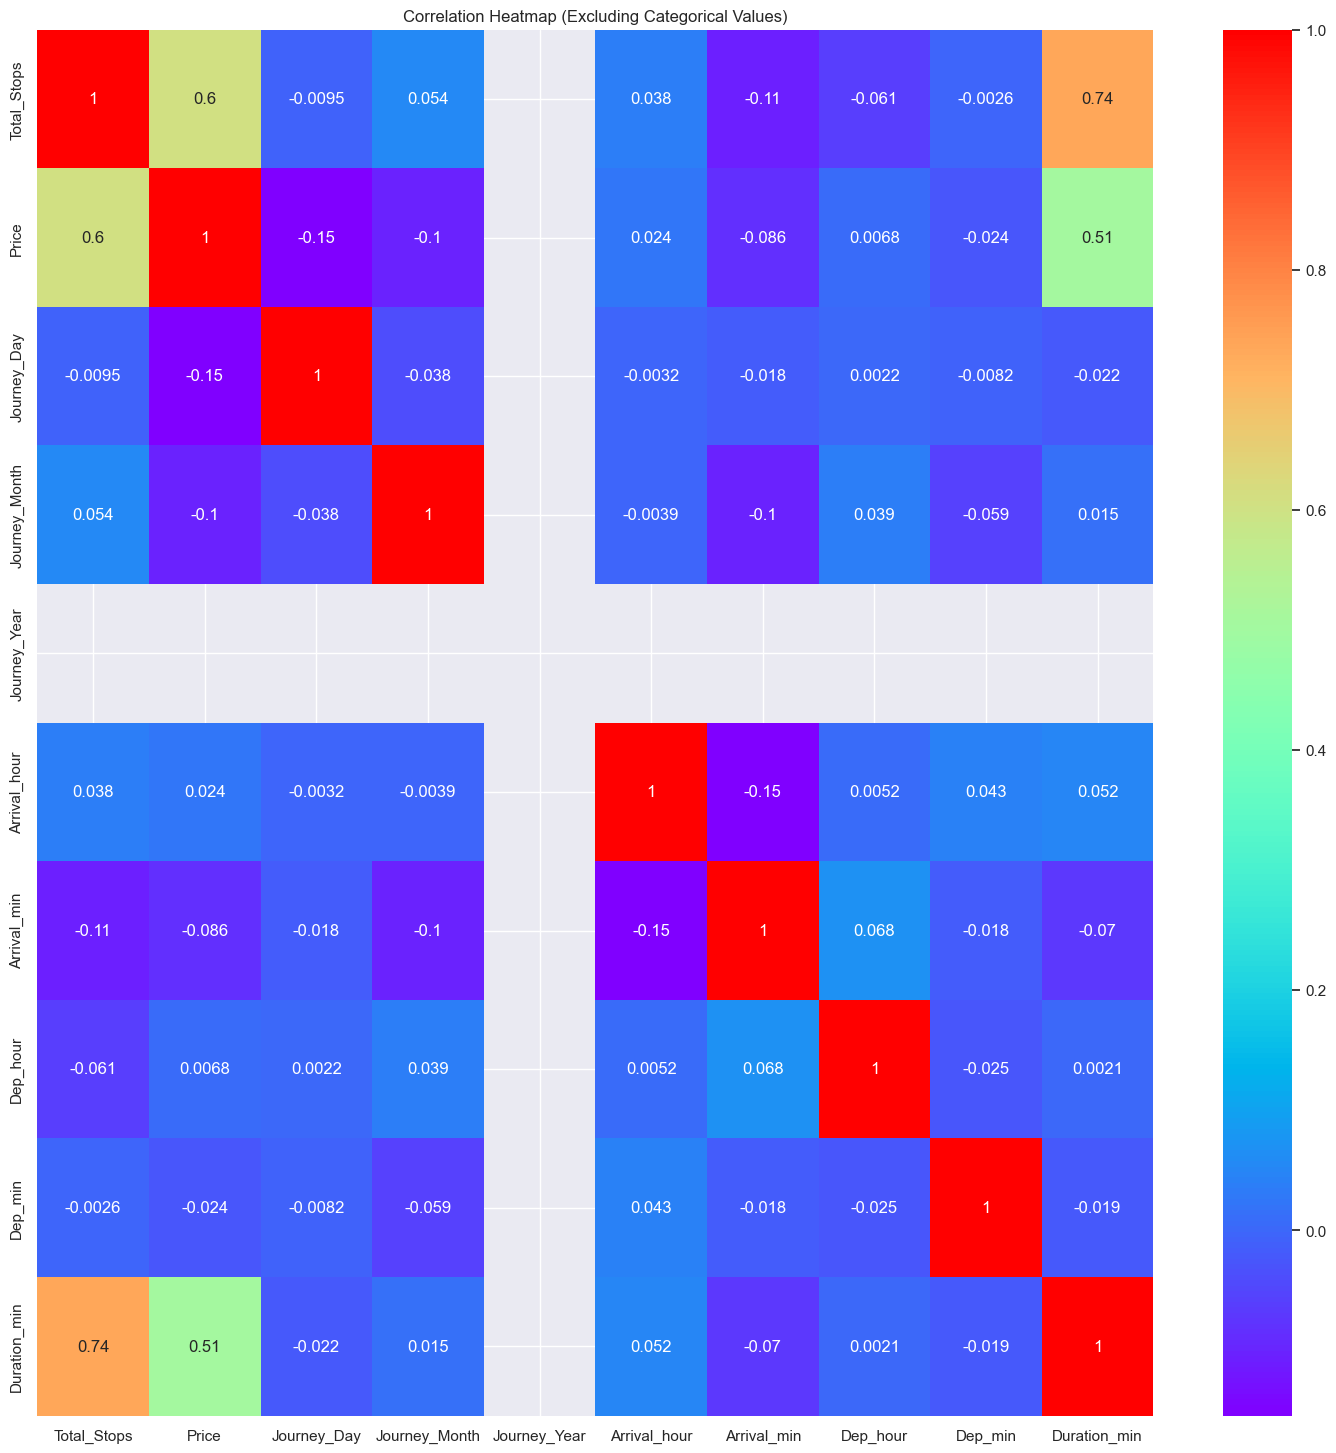

In [251]:
# Filter out the numeric columns
numeric_data = training_data.select_dtypes(include='integer')

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap,
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap (Excluding Categorical Values)')
plt.show()